<a href="https://colab.research.google.com/github/farisassallami/Project_2/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_selector ,  make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Loading data

In [2]:
df = pd.read_csv('/Users/faris/Downloads/untitled folder/adult.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print('Statistics look normal, no outliers.')
df.describe()

Statistics look normal, no outliers.


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Cleaning Data

## Feature Engineering

### Dropping Irrelevant columns

In [5]:
# Dropping 3 columns.
df = df.drop(columns=['fnlwgt','relationship','education','workclass'])
df.head()

,age,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,18,10,Never-married,?,White,Female,0,0,30,United-States,<=50K


### Creating Net capital gains column and droping capuital gain and loss columns

In [6]:
df['Net Capital Gain'] = df['capital-gain'] - df['capital-loss']
df = df.drop(columns = ['capital-gain','capital-loss'])
df.head()

,age,educational-num,marital-status,occupation,race,gender,hours-per-week,native-country,income,Net Capital Gain
0,25,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K,0
1,38,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K,0
2,28,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K,0
3,44,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K,7688
4,18,10,Never-married,?,White,Female,30,United-States,<=50K,0


### Binary encodinng the income target column and changing its name to "greater than 50k" and gender column to "is_male"

In [7]:
df.rename(columns={'gender':'is_Male'}, inplace=True)
df['is_Male'].replace({'Female':0,'Male':1}, inplace=True)

df.head()

,age,educational-num,marital-status,occupation,race,is_Male,hours-per-week,native-country,income,Net Capital Gain
0,25,7,Never-married,Machine-op-inspct,Black,1,40,United-States,<=50K,0
1,38,9,Married-civ-spouse,Farming-fishing,White,1,50,United-States,<=50K,0
2,28,12,Married-civ-spouse,Protective-serv,White,1,40,United-States,>50K,0
3,44,10,Married-civ-spouse,Machine-op-inspct,Black,1,40,United-States,>50K,7688
4,18,10,Never-married,?,White,0,30,United-States,<=50K,0


### Checking for duplicate rows

In [8]:
# Checking for duplicate 
dup = df.duplicated().sum()
print(f'There are {dup} duplicate rows.')

# Removing duplicate rows
df.drop_duplicates(inplace = True)
dupl = df.duplicated().sum()
print(f"There are now {dupl} duplicate rows since we dropped them.")


There are 10260 duplicate rows.
There are now 0 duplicate rows since we dropped them.


### Checking for missing values

In [9]:
df.isna().sum()

age                 0
educational-num     0
marital-status      0
occupation          0
race                0
is_Male             0
hours-per-week      0
native-country      0
income              0
Net Capital Gain    0
dtype: int64

### Using a for loop to check for inconsistencies in data

In [10]:
# # checking for inconsistencies in the data 
datatypes = df.dtypes
stringcols = datatypes[datatypes=='object'].index
stringcols

# using for loop to check for inconsistencies 
for i in stringcols:
  print(f'--Column = {i}')
  print(df[i].value_counts(dropna=False))
  print('\n\n')

--Column = marital-status
Married-civ-spouse       17789
Never-married            11525
Divorced                  5671
Widowed                   1468
Separated                 1468
Married-spouse-absent      624
Married-AF-spouse           37
Name: marital-status, dtype: int64



--Column = occupation
Prof-specialty       5124
Exec-managerial      4876
Sales                4383
Craft-repair         4144
Adm-clerical         4117
Other-service        3948
?                    2330
Machine-op-inspct    2323
Transport-moving     1932
Handlers-cleaners    1613
Farming-fishing      1367
Tech-support         1282
Protective-serv       889
Priv-house-serv       239
Armed-Forces           15
Name: occupation, dtype: int64



--Column = race
White                 31907
Black                  4293
Asian-Pac-Islander     1507
Amer-Indian-Eskimo      469
Other                   406
Name: race, dtype: int64



--Column = native-country
United-States                 33623
Mexico                     

While there are missing values in the data set, we will not impute anything now that way we avoid data leakage.  However there are a few inconsistencies we found in the Marital status column which will be corrected.

In [11]:
# Fixing the marital status column ,married AF spouse means military family, married spouse absent can be considered as seperated
df['marital-status'].replace({'Married-AF-spouse':'Married-civ-spouse','Married-spouse-absent':'Separated'},inplace=True)
df['marital-status'].value_counts()

Married-civ-spouse    17826
Never-married         11525
Divorced               5671
Separated              2092
Widowed                1468
Name: marital-status, dtype: int64

## Handling the columns

In [12]:
cat_attributes = df.select_dtypes(include=['object'])
num_attributes = df.select_dtypes(include=['number'])


### Visualizing the numberic columns

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'educational-num'}>],
       [<AxesSubplot: title={'center': 'is_Male'}>,
        <AxesSubplot: title={'center': 'hours-per-week'}>],
       [<AxesSubplot: title={'center': 'Net Capital Gain'}>,
        <AxesSubplot: >]], dtype=object)

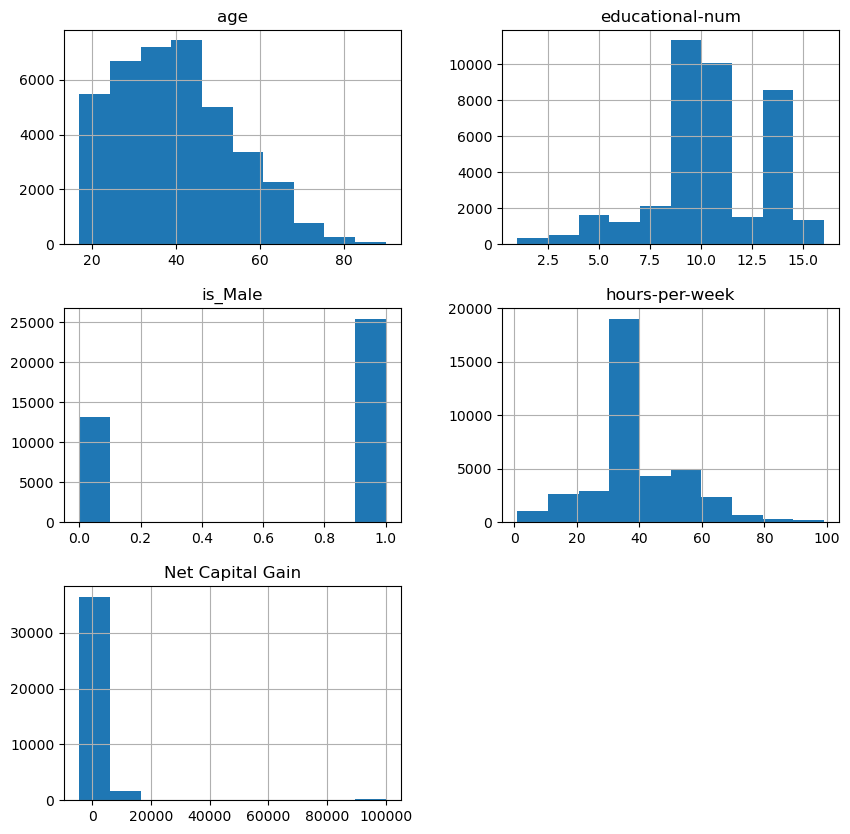

In [13]:
num_attributes.hist(figsize=(10,10))

### Visualizing the categorical columns.

<AxesSubplot: xlabel='count', ylabel='occupation'>

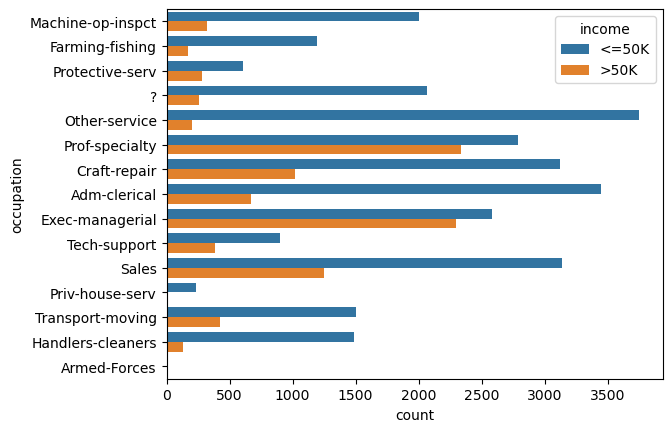

In [14]:
sns.countplot(y='occupation', hue='income', data = cat_attributes)

We can see from the countplot above that Prof-Specialty and Exec-managerial positions were the top 2 highest paying positions for incomes greater than 50K

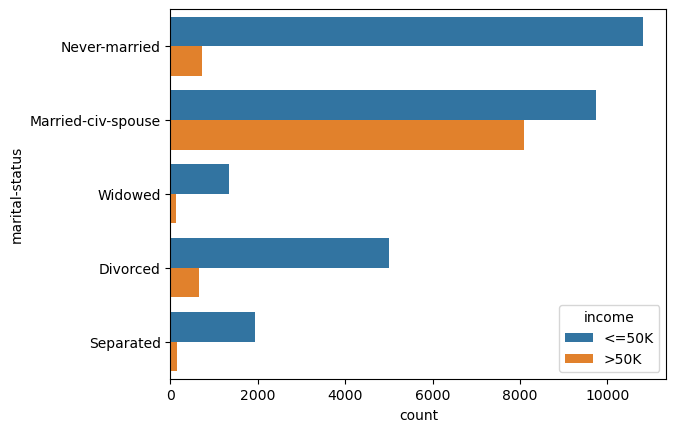

In [15]:
# Using a countplot to show the relationship between marital status and income
sns.countplot( y='marital-status', hue = 'income', data = cat_attributes);

We can see from the count plot above that the Married couples had the most income above 50K

/var/folders/15/t06gywxj5nj9956_98qpphjc0000gn/T/ipykernel_50575/2062548664.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df,x = 'is_Male', y = 'hours-per-week',hue = 'income',order = gender_groups_hours.index, ci = None).set_title(' Average Hours worked by gender')


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

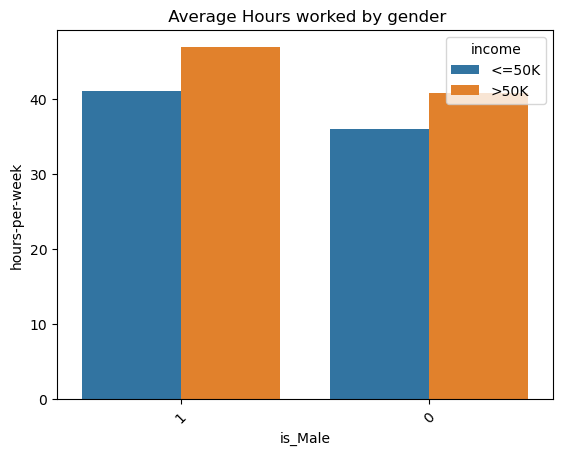

In [16]:
gender_groups_hours = df.groupby('is_Male')['hours-per-week'].mean().sort_values(ascending=False)
gender_groups_hours

sns.barplot(data = df,x = 'is_Male', y = 'hours-per-week',hue = 'income',order = gender_groups_hours.index, ci = None).set_title(' Average Hours worked by gender')
plt.xticks(rotation = 45)

According to the bar plot above, we can see that on average men worked more hours per week on average than women.

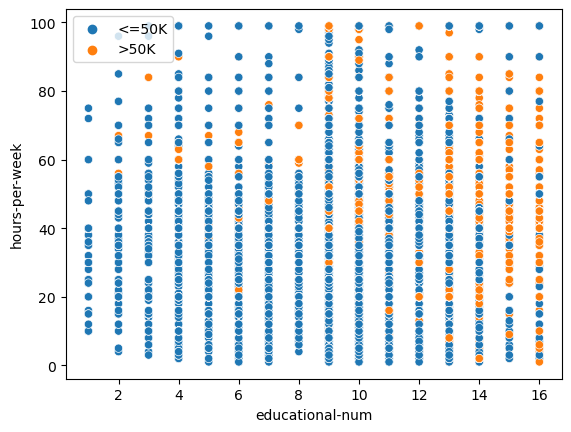

In [17]:
sns.scatterplot(data = df, x = 'educational-num', y = 'hours-per-week', hue = 'income')
plt.legend();

We can see that those with income greater than 50K tend to work higher hours per week than those with income less than or equal to 50K.

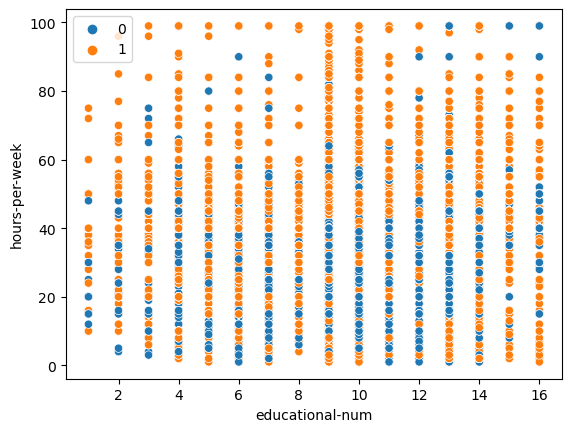

In [18]:
sns.scatterplot(data = df, x = 'educational-num', y = 'hours-per-week', hue = 'is_Male')
plt.legend();

We can see that on average men tended to work more hours per week than women on all education levels.  We now know that higher education leads to higher income, let us see if education level by race indicates which race on average has the highest income.

/var/folders/15/t06gywxj5nj9956_98qpphjc0000gn/T/ipykernel_50575/528700882.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df,x = 'race', y = 'educational-num',hue = 'income',order = race_groups_education.index, ci = None).set_title('Education years vs Income by race')


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Asian-Pac-Islander'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

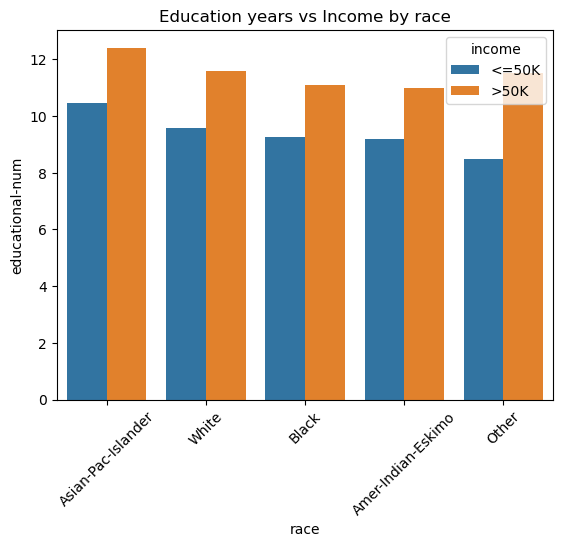

In [19]:
race_groups_education = df.groupby('race')['educational-num'].mean().sort_values(ascending=False)
race_groups_education

sns.barplot(data = df,x = 'race', y = 'educational-num',hue = 'income',order = race_groups_education.index, ci = None).set_title('Education years vs Income by race')
plt.xticks(rotation = 45)




We can see that the highest educated race the asian-pacific islander tended to have the highest income.

# Preparing the data appropriately for modeling

In [20]:
df.rename(columns={'income':'Income Greater than 50K'}, inplace=True)

In [21]:
# Setting target and features
y = df['Income Greater than 50K']
X = df.drop(columns = 'Income Greater than 50K')

# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [22]:
# checking for inconsistencies in the data 
datatypes = df.dtypes
stringcols = datatypes[datatypes=='object'].index
stringcols

# using for loop to check for inconsistencies 
for i in stringcols:
  print(f'--Column = {i}')
  print(df[i].value_counts(dropna=False))
  print('\n\n')

--Column = marital-status
Married-civ-spouse    17826
Never-married         11525
Divorced               5671
Separated              2092
Widowed                1468
Name: marital-status, dtype: int64



--Column = occupation
Prof-specialty       5124
Exec-managerial      4876
Sales                4383
Craft-repair         4144
Adm-clerical         4117
Other-service        3948
?                    2330
Machine-op-inspct    2323
Transport-moving     1932
Handlers-cleaners    1613
Farming-fishing      1367
Tech-support         1282
Protective-serv       889
Priv-house-serv       239
Armed-Forces           15
Name: occupation, dtype: int64



--Column = race
White                 31907
Black                  4293
Asian-Pac-Islander     1507
Amer-Indian-Eskimo      469
Other                   406
Name: race, dtype: int64



--Column = native-country
United-States                 33623
Mexico                          920
?                               849
Philippines                     

In [23]:
# Fixing inconsistencies in categorical data columns
df['occupation'].replace({'?':'Prof-specialty'}, inplace=True)
df['native-country'].replace({'?':'United-States'},inplace=True)

## Initiating the transformers

In [24]:
# One hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Initiating scaler 
scaler = StandardScaler()

In [25]:
# Column selectors
nmr_selector = make_column_selector(dtype_include ='number')
ctg_selector = make_column_selector(dtype_include='object')

ctg_clmns = ctg_selector(X_train)
nmr_clmns = nmr_selector(X_train)



In [26]:
# Making pipelines 
nmr_pipe = make_pipeline(scaler)
ctg_pipe = make_pipeline(ohe)

In [27]:

# Initiating column transformer
nmr_tuple = (nmr_pipe, nmr_selector)
ctg_tuple = (ctg_pipe, ctg_selector)

pre_processor = make_column_transformer(nmr_tuple, ctg_tuple, remainder='passthrough')
pre_processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1617dca00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x162096e80>)])

In [28]:
# Fitting preprocessed train data
pre_processor.fit(X_train)



ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1617dca00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x162096e80>)])

In [29]:
# Saving processed train and test data
X_train_processed = pre_processor.transform(X_train)
X_test_processed = pre_processor.transform(X_test)

In [30]:
# Inspecting result
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of train data is', X_train_processed.shape)
print('shape of test data is', X_test_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of train data is (28936, 72)
shape of test data is (9646, 72)




# Modeling

## PCA

/var/folders/15/t06gywxj5nj9956_98qpphjc0000gn/T/ipykernel_50575/1964925927.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


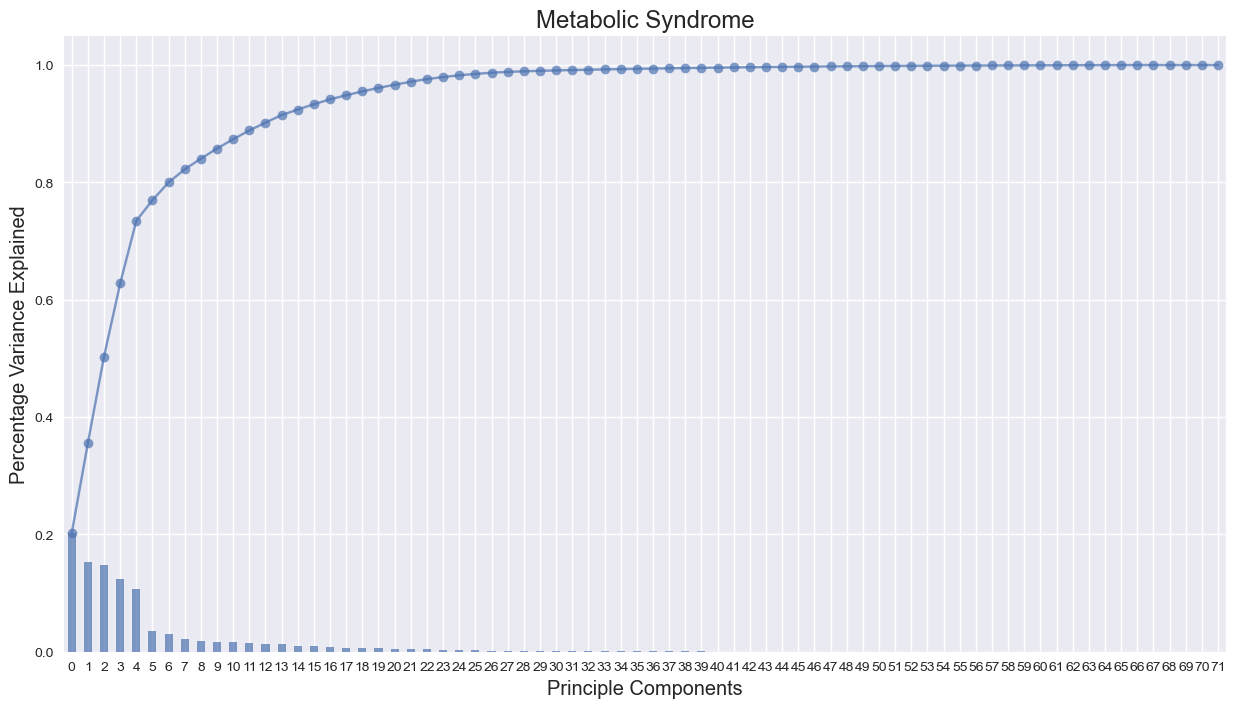

In [31]:
# Instantiate & fit data using PCA
# Note: Here is need all the components for the plot 
# This will help us determine the n_components we should use in ML

pca = PCA() # this is going generate 30 pcs 

pca.fit(X_train_processed)

# Lets visual the cummulative sum of the variances 

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 

# Plot labels and titles
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Metabolic Syndrome", fontsize="xx-large")
plt.show();

In [32]:
# PCA Preprocessing 
pca = PCA(n_components=20)


# Creating a transformer pipeline
transformer = make_pipeline(scaler, pca)

## Random Forest Model

In [33]:
# Default Random Forest Model
# Initiating the model
rf = RandomForestClassifier()
rf2 = RandomForestClassifier()

# Making the Pipeline
rf_pipe = make_pipeline(scaler, rf)
rf_pipe_pca = make_pipeline(transformer,rf2)

# Fitting on Train Data
rf_pipe.fit(X_train_processed, y_train)
rf_pipe_pca.fit(X_train_processed, y_train)

# Saving the Predictions (NO PCA)
rf_train_pred = rf_pipe.predict(X_train_processed)
rf_test_pred = rf_pipe.predict(X_test_processed)

# Saving the Predictions (With PCA)
rfPCA_train_pred = rf_pipe_pca.predict(X_train_processed)
rfPCA_test_pred = rf_pipe_pca.predict(X_test_processed)

### Confusion Matrix without PCA & with PCA

Train Classification Report 

              precision    recall  f1-score   support

       <=50K       0.98      0.98      0.98     21610
        >50K       0.95      0.94      0.95      7326

    accuracy                           0.97     28936
   macro avg       0.97      0.96      0.96     28936
weighted avg       0.97      0.97      0.97     28936

Test Classification Report 

              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.87      7228
        >50K       0.62      0.57      0.60      2418

    accuracy                           0.81      9646
   macro avg       0.74      0.73      0.73      9646
weighted avg       0.80      0.81      0.80      9646



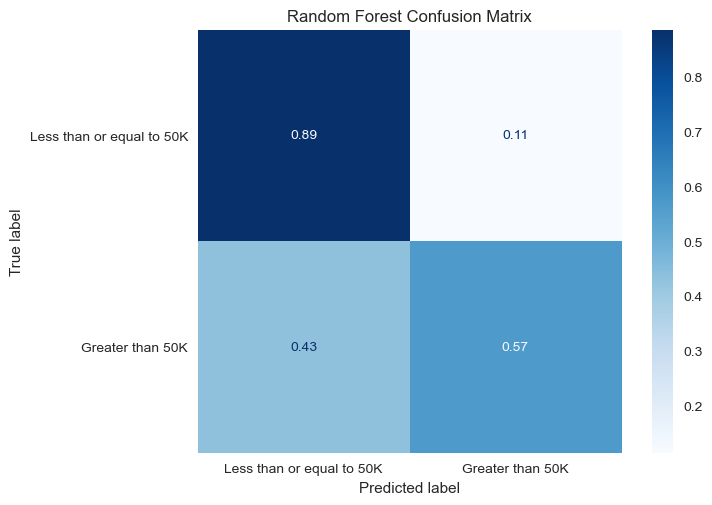

In [39]:
# Confusion Matrix

labels = ['Less than or equal to 50K','Greater than 50K']
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_pred, display_labels=labels , cmap='Blues',normalize='true').ax_.set_title('Random Forest Confusion Matrix',sns.set_style("whitegrid", {'axes.grid' : False}))

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rf_train_pred))
print('Test Classification Report', '\n')
print(classification_report(y_test, rf_test_pred))

Train Classification Report PCA 

              precision    recall  f1-score   support

       <=50K       0.91      0.93      0.92     21610
        >50K       0.78      0.73      0.76      7326

    accuracy                           0.88     28936
   macro avg       0.85      0.83      0.84     28936
weighted avg       0.88      0.88      0.88     28936

Test Classification Report PCA 

              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      7228
        >50K       0.65      0.58      0.61      2418

    accuracy                           0.82      9646
   macro avg       0.76      0.74      0.75      9646
weighted avg       0.81      0.82      0.81      9646



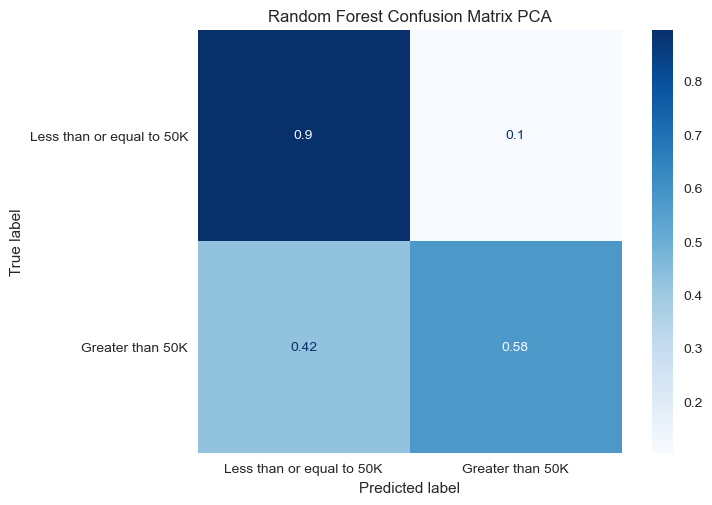

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, rfPCA_test_pred, display_labels=labels , cmap='Blues',normalize='true').ax_.set_title('Random Forest Confusion Matrix PCA', sns.set_style("whitegrid", {'axes.grid' : False}))


# Classification Report for PCA
print('Train Classification Report PCA', '\n')
print(classification_report(y_train, rfPCA_train_pred))
print('Test Classification Report PCA', '\n')
print(classification_report(y_test, rfPCA_test_pred))

Since we got slightly better results with the PCA , we will use Gridsearch on the PCA random forest model

### Using gridsearch to find best parameters

In [51]:
# Finding parameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 

In [52]:
# Setting up Parameter Grid
param_grid = {'randomforestclassifier__max_depth': range(2,20),
              'randomforestclassifier__n_estimators': range(5,60)}

In [53]:
# Making instance of gridsearch
rf_gridsearch = GridSearchCV(rf_pipe, param_grid)

# Fitting on Train data
rf_gridsearch.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': range(2, 20),
                         'randomforestclassifier__n_estimators': range(5, 60)})

In [54]:
print('Best Random Forest Parameters:')
print(rf_gridsearch.best_params_)
best_pipe = rf_gridsearch.best_estimator_
print(f'Accuracy of the Best Random Forest Model (With PCA): {best_pipe.score(X_test_processed, y_test).round(5)}')

Best Random Forest Parameters:
{'randomforestclassifier__max_depth': 15, 'randomforestclassifier__n_estimators': 58}
Accuracy of the Best Random Forest Model (With PCA): 0.84667


In [55]:
# Tuned Random Forest Model

# Instance of model using max depth of 15 and n_estimators of 58
rftuned = RandomForestClassifier(max_depth=15, n_estimators=58)

# Making tuned Pipeline
rftuned_pipe = make_pipeline(scaler, rftuned)

# Fitting on Train data
rftuned_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, n_estimators=58))])

In [56]:
# Saving Predictions
rftuned_trainpred = rftuned_pipe.predict(X_train_processed)
rftuned_testpred = rftuned_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92     21610
        >50K       0.84      0.62      0.71      7326

    accuracy                           0.87     28936
   macro avg       0.86      0.79      0.81     28936
weighted avg       0.87      0.87      0.87     28936

Test Classification Report 

              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90      7228
        >50K       0.77      0.55      0.64      2418

    accuracy                           0.85      9646
   macro avg       0.82      0.75      0.77      9646
weighted avg       0.84      0.85      0.84      9646



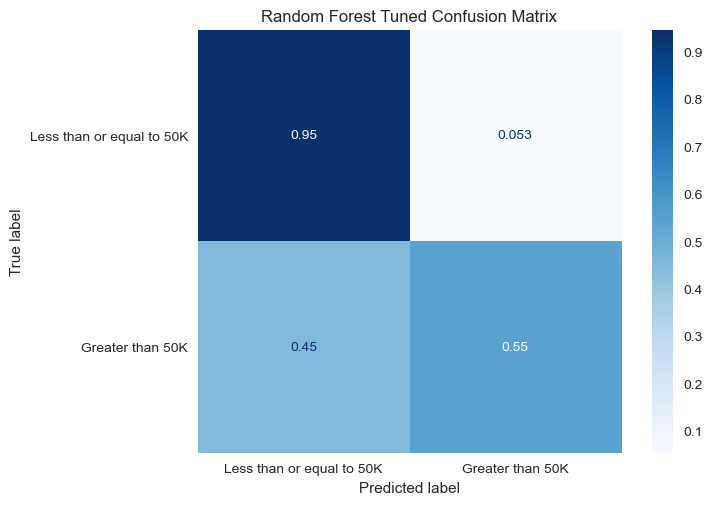

In [57]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rftuned_testpred, display_labels=labels, cmap='Blues', normalize='true').ax_.set_title('Random Forest Tuned Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rftuned_trainpred))
print('Test Classification Report', '\n')
print(classification_report(y_test, rftuned_testpred))

## KNN Model

In [58]:

# Initiating model
knn = KNeighborsClassifier()

# Making Knn Pipeline
knn_pipe = make_pipeline(scaler, knn)

# Fitting on Train data
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [59]:
# Saving Predictions
knn_train_pred = knn_pipe.predict(X_train_processed)
knn_test_pred = knn_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91     21610
        >50K       0.78      0.66      0.71      7326

    accuracy                           0.87     28936
   macro avg       0.84      0.80      0.81     28936
weighted avg       0.86      0.87      0.86     28936

Test Classification Report 

              precision    recall  f1-score   support

       <=50K       0.85      0.89      0.87      7228
        >50K       0.61      0.53      0.57      2418

    accuracy                           0.80      9646
   macro avg       0.73      0.71      0.72      9646
weighted avg       0.79      0.80      0.79      9646



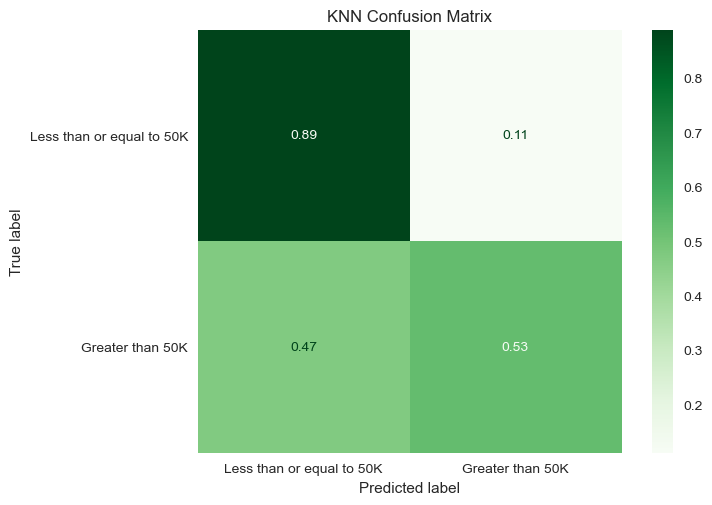

In [60]:
# KNN Model Metrics

# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_pred,display_labels=labels, cmap='Greens', normalize='true').ax_.set_title('KNN Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, knn_train_pred))
print('Test Classification Report', '\n')
print(classification_report(y_test, knn_test_pred))

### Using gridsearch to find best parameters

In [61]:
# Tuning KNN Model with GridSearchCV

# Checking Parameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [62]:
# Setting up Parameter Grid
param_grid = {'kneighborsclassifier__n_neighbors': range(1,11),
              'kneighborsclassifier__weights': ['uniform', 'distance']}
     

In [63]:
# Gridsearch
knn_gridscv = GridSearchCV(knn_pipe, param_grid)

# Fitting on Train data
knn_gridscv.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 11),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [64]:
print('Best KNN Parameters:')
print(knn_gridscv.best_params_)
best_pipe = knn_gridscv.best_estimator_
print(f'Accuracy of the Best KNN Model: {best_pipe.score(X_test_processed, y_test).round(5)}')
     

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of the Best KNN Model: 0.80966


### Tuning KNN model 

In [65]:
# Tuned KNN model

# Instance of model using best KNN parameters
knntuned = KNeighborsClassifier(n_neighbors = 10, weights='uniform' )


# Making Knn Pipeline
knntuned_pipe = make_pipeline(scaler, knn)

# Fitting on Train data
knntuned_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [66]:
# Saving Predictions
knntuned_trainpred = knntuned_pipe.predict(X_train_processed)
knntuned_testpred = knntuned_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91     21610
        >50K       0.78      0.66      0.71      7326

    accuracy                           0.87     28936
   macro avg       0.84      0.80      0.81     28936
weighted avg       0.86      0.87      0.86     28936

Test Classification Report 

              precision    recall  f1-score   support

       <=50K       0.85      0.89      0.87      7228
        >50K       0.61      0.53      0.57      2418

    accuracy                           0.80      9646
   macro avg       0.73      0.71      0.72      9646
weighted avg       0.79      0.80      0.79      9646



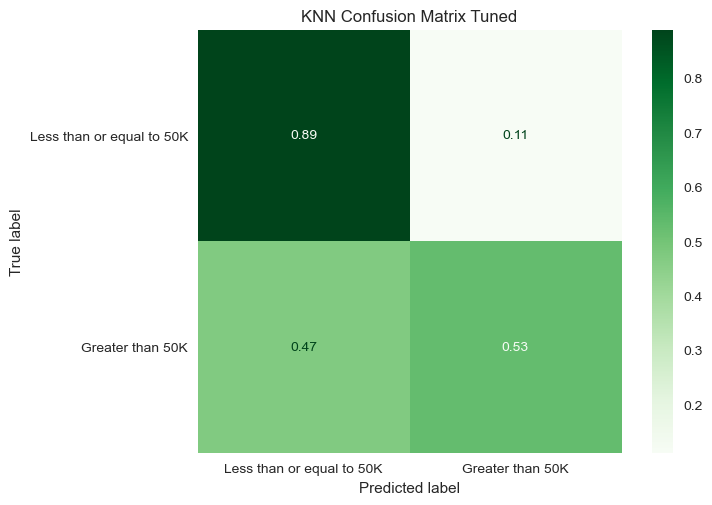

In [68]:
# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, knntuned_testpred,display_labels=labels, cmap='Greens', normalize='true').ax_.set_title('KNN Confusion Matrix Tuned',sns.set_style("whitegrid", {'axes.grid' : False}))


# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, knn_train_pred))
print('Test Classification Report', '\n')
print(classification_report(y_test, knn_test_pred))

Both KNN models had the same accuracy.

The production model I will choose is the Tuned random forest model.  It scored the highest accuracy of 85% which is higher than all the models.  Recommendation to increase income is by increasing education to get into higher paying jobs and to work extra hours overtime when available to employee.